# Credit fraud detections-Group work of big data

Bonjour professor,
We are ZHU Huilei and SBYOU Kaoutar. We found a dataset on credit card fraud from the Kaggle website, and here's our job.


Context:
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content:
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA(Principal components analysis) transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_2_Background/CreditCardFraud.html

## Scenario analysis

The problem to be solved is to predict whether the transactions will be a fraud or not, which is a binary classification problem. Thus, we choose the logistic regression as our baseline.

## Data preprocessing
<br/>Import packages

In [29]:
# Imports
# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

# matplotlib,seaborn,pyecharts
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


#  ignore warnings
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [30]:

transactions = pd.read_csv("creditcard.csv")

In [31]:
##transactions = spark.sql("select * from creditcard").toPandas()

In [32]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


It can be seen from the above that the data is structured data and does not require feature extraction transformation<br/>1. Time:Number of seconds elapsed between this transaction and the first transaction in the dataset <br/> 2. V1-V28:may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
<br/>3. Amount:It is the transaction Amount which can be scaled directly (0,1)<br/>4. Class:It is the response variable and it takes value 1 in case of fraud and 0 otherwise

In [33]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [34]:
transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0000,94813.8596,47488.1460,0.0000,54201.5000,84692.0000,139320.5000,172792.0000
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,-0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V8,284807.0000,-0.0000,1.1944,-73.2167,-0.2086,0.0224,0.3273,20.0072
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950


The unit of the characteristic Time is seconds, and we convert it into hours corresponding to the time of day


In [35]:
transactions['Hour'] = (transactions['Time']//3600).astype(int)
transactions.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
251790,155502.0000,-1.1041,1.8282,-0.6385,0.8931,0.4855,-0.8953,1.0343,0.1377,-0.2886,...,0.5745,-0.1298,-0.0871,0.1593,-0.3625,0.4365,0.2672,14.9900,0,43
55025,46736.0000,-1.3800,-0.1195,0.2675,1.4079,-1.2612,-0.7026,1.2611,0.1172,-0.4013,...,0.4142,0.9894,0.6635,-0.0104,-0.3163,0.0433,-0.1825,298.6200,0,12
134353,80768.0000,1.1706,-0.3581,1.1359,0.2588,-1.1398,-0.3572,-0.5631,-0.0022,1.0674,...,-0.3506,0.0509,0.4980,0.1587,0.9368,-0.0319,0.0201,30.0000,0,22
34151,37534.0000,-0.9625,0.2062,1.4818,-1.0274,-0.5218,0.7210,-0.4415,0.9628,0.5345,...,-0.1999,0.0402,-0.6414,-0.5756,0.8051,-0.0579,0.0366,39.7700,0,10
210755,138109.0000,-0.3608,0.9430,0.2570,0.3852,0.6068,-0.8061,0.9438,-0.2864,0.0498,...,0.8617,-0.1253,-0.0217,0.0116,-0.5651,-0.2836,0.0174,1.9900,0,38


In [36]:
transactions.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

## Data analysis

In [37]:
#if Class=0(normal transaction),Class=1(fraud),let's see the amount of different samples
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

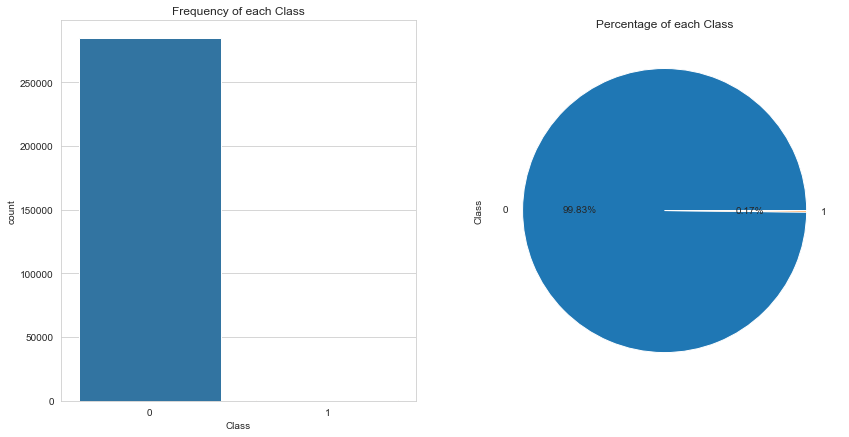

In [38]:
# Visualization of target variable distribution 
fig, axs = plt.subplots(1,2,figsize=(14,7))
# Histogram
sns.countplot(x='Class',data=transactions,ax=axs[0])
axs[0].set_title("Frequency of each Class")

# Pie chart
transactions['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

Of the 284,807 transactions in the data set, 492 are fraud transactions, and the total proportion of fraud transactions is 0.17%. The number of normal transactions and fraud transactions is unbalanced, and the sample imbalance affects the learning of the classifier. We are gonna use the oversampling method  to solve the problem of sample imbalance.

## Analysis of the variables of normal and fraud transactions

In [39]:
# Acquire data
fraud = transactions[transactions['Class'] == 1]
nonFraud = transactions[transactions['Class'] == 0]

# Correlation calculation
correlationNonFraud = nonFraud.loc[:, transactions.columns != 'Class'].corr()
correlationFraud = fraud.loc[:, transactions.columns != 'Class'].corr()

# Upper Triangular Matrix Setup
mask = np.zeros_like(correlationNonFraud)# set all to 0
indices = np.triu_indices_from(correlationNonFraud)#Returns the upper triangular matrix of the function
mask[indices] = True

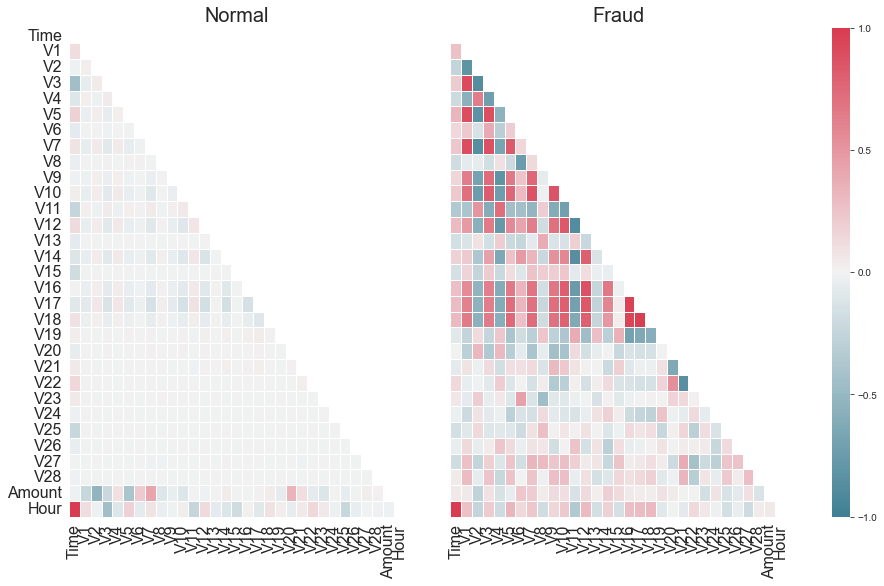

In [40]:
grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (14, 9))

# Normal transations-feature correlation display
cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16)
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16) 
ax1.set_title('Normal', size = 20)

# Fraud transactions=feature correlation display
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraud', size = 20);

As can be seen from the figure above, compared with the normal transactions, the correlation in the fraud transactions between some variables(V1~V28) is more obvious.

## Analysis of the relationship between Fraud and Amount

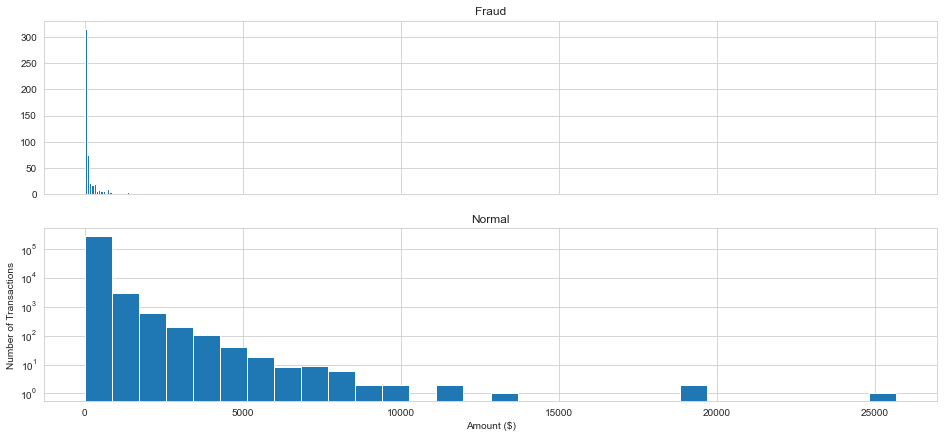

In [41]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,7))
bins = 30
ax1.hist(transactions["Amount"][transactions["Class"]== 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(transactions["Amount"][transactions["Class"] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Compared with the amount of normal transactions, the amount of fraud transactions is scattered and small. This shows that frauds prefers to choose small amount of consumption in order not to attract the attention of credit card owners.

## Analysis of the relationship between Time and Amount

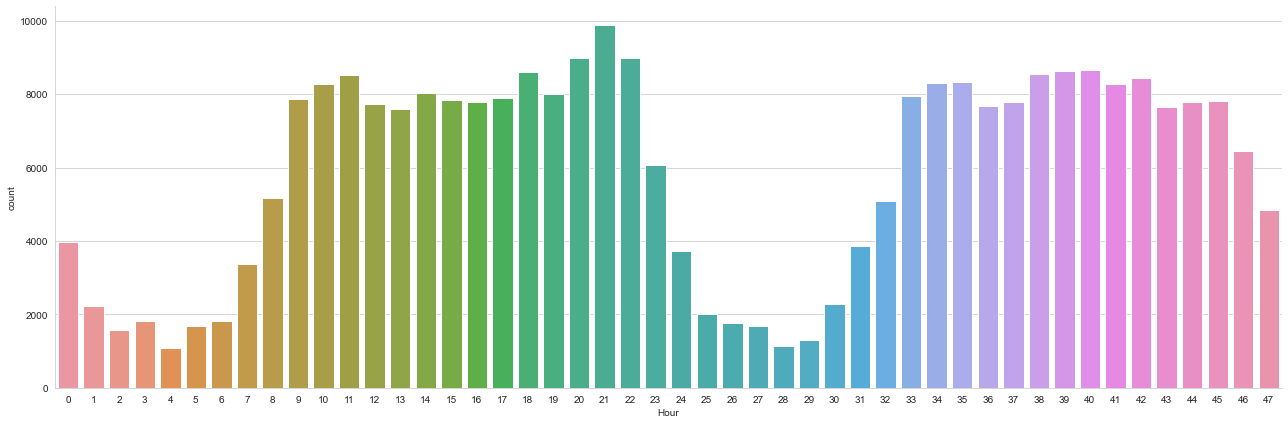

In [42]:
# transactions per hour
sns.factorplot(x="Hour", data=transactions, kind="count", size=6, aspect=3)


The data is the data of 2 days: the corresponding time Hour ranges from 0 to 48. The above figure shows that the high-frequency time period for credit card consumption is between 9:00 am and 11:00 pm every day.

<br/>Therefore, it is speculated that in order to reduce the risk of being identified, fraudulent credit card swiping time is placed in the concentrated area of normal credit card swiping time.

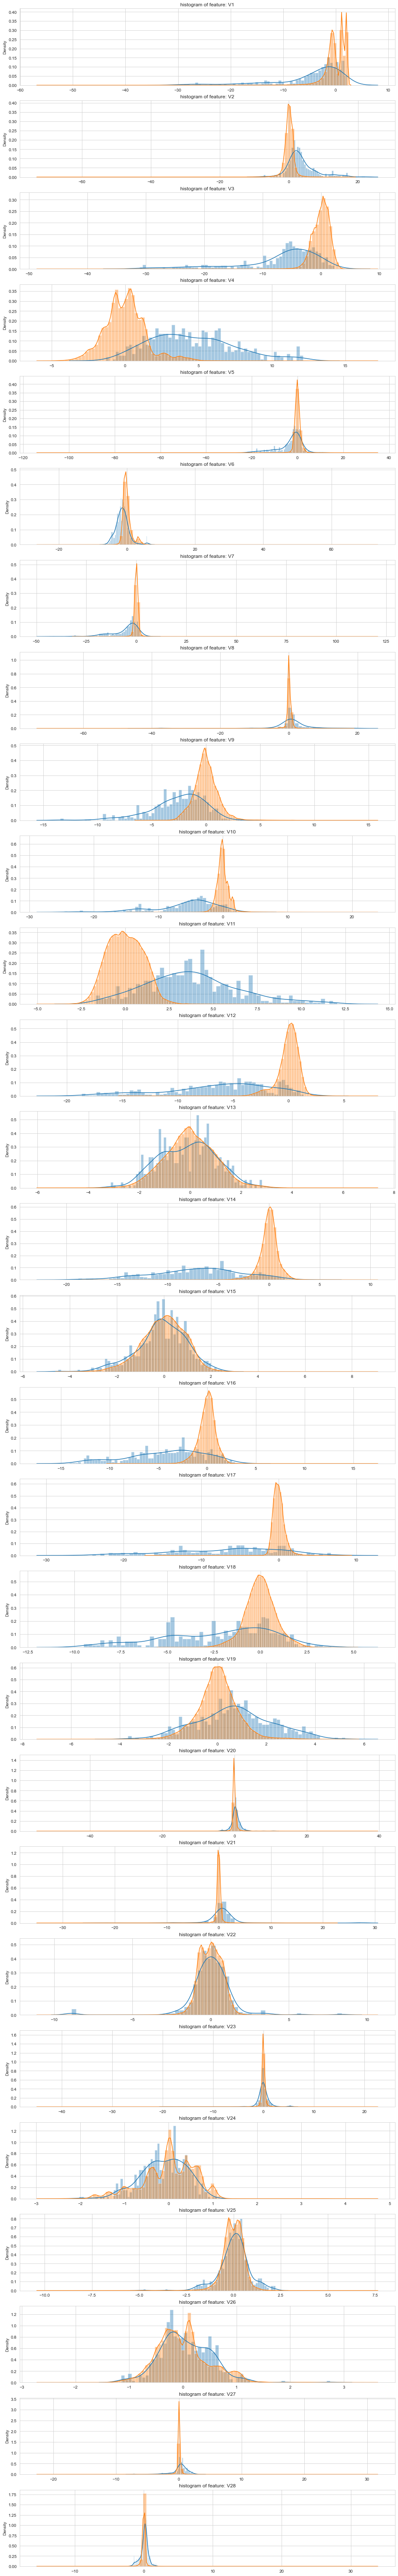

In [43]:
v_feat_col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
         'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
v_feat_col_size = len(v_feat_col)


plt.figure(figsize=(16,v_feat_col_size*4))
gs = gridspec.GridSpec(v_feat_col_size, 1)
for i, cn in enumerate(transactions[v_feat_col]):
    ax = plt.subplot(gs[i])
    sns.distplot(transactions[cn][transactions["Class"] == 1], bins=60)# V1 fraud,blue
    sns.distplot(transactions[cn][transactions["Class"] == 0], bins=100)# V1 normal,orange
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))

For variables with significantly different distributions under different credit card states (1-fraud; 0-normal), select the features with obvious discrimination. Analysis from the above figure: Therefore, the variables V8, V13, V15, V20, V21, V22, V23, V24, V25, V26, V27 and V28 variables are eliminated (these features cannot distinguish categories well)

In [44]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0,0


In [45]:
# delete 'V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time'variables
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
transactions_new = transactions.drop(droplist, axis = 1)
print(transactions_new.shape) #Features reduced from 31 to 18 (excluding target variable)
transactions_new.tail()

(284807, 19)


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
284802,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,1.9144,4.3562,-1.5931,2.7119,4.6269,1.1076,1.9917,0.5106,-0.6829,0.7700,0,47
284803,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.5848,-0.9759,-0.1502,0.9158,-0.6751,-0.7118,-0.0257,-1.2212,-1.5456,24.7900,0,47
284804,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.4325,-0.4848,0.4116,0.0631,-0.5106,0.1407,0.3135,0.3957,-0.5773,67.8800,0,47
284805,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.3921,-0.3991,-1.9338,-0.9629,0.4496,-0.6086,0.5099,1.1140,2.8978,10.0000,0,47
284806,-0.5334,-0.1897,0.7033,-0.5063,-0.0125,-0.6496,1.5770,0.4862,-0.9154,-1.0405,-0.0315,-0.0843,-0.3026,-0.6604,0.1674,-0.2561,217.0000,0,47



## Feature processing

The specifications of the features Hour and Amount are quite different from other features, which perform feature scaling，Hence we are gonna do feature scaling

In [46]:
# Feature scaling to amount and hour
col = ['Amount','Hour']
from sklearn.preprocessing import StandardScaler # 
sc =StandardScaler() # Initialize the scaler Function: remove the mean and normalize the variance. And it is done for each feature dimension, not for samples
transactions_new[col] =sc.fit_transform(transactions_new[col])#standardize data
transactions_new.tail()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
284802,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,1.9144,4.3562,-1.5931,2.7119,4.6269,1.1076,1.9917,0.5106,-0.6829,-0.3502,0,1.6044
284803,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.5848,-0.9759,-0.1502,0.9158,-0.6751,-0.7118,-0.0257,-1.2212,-1.5456,-0.2541,0,1.6044
284804,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.4325,-0.4848,0.4116,0.0631,-0.5106,0.1407,0.3135,0.3957,-0.5773,-0.0818,0,1.6044
284805,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.3921,-0.3991,-1.9338,-0.9629,0.4496,-0.6086,0.5099,1.1140,2.8978,-0.3132,0,1.6044
284806,-0.5334,-0.1897,0.7033,-0.5063,-0.0125,-0.6496,1.5770,0.4862,-0.9154,-1.0405,-0.0315,-0.0843,-0.3026,-0.6604,0.1674,-0.2561,0.5144,0,1.6044


In [47]:
transactions_new.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,-0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950
V10,284807.0000,0.0000,1.0888,-24.5883,-0.5354,-0.0929,0.4539,23.7451
V11,284807.0000,0.0000,1.0207,-4.7975,-0.7625,-0.0328,0.7396,12.0189


## Feature Importance Analysis
Use the feature importance of random forest to sort the importance of features

In [48]:
x_feature = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Amount',  'Hour']
x_val = transactions_new[x_feature]
y_val = transactions_new['Class']

clf=RandomForestClassifier(n_estimators=10,random_state=123,max_depth=4)#Build a Classification Random Forest Classifier
clf.fit(x_val, y_val) #Fitting Independent and Dependent Variables

for feature in zip(x_feature,clf.feature_importances_):
    print(feature)
    
    

('V1', 0.0008826091438778425)
('V2', 0.0021058185061093608)
('V3', 0.009750867340434583)
('V4', 0.01751094043420745)
('V5', 0.008600547467227002)
('V6', 0.013298075656335426)
('V7', 0.0086835897086001)
('V9', 0.023090145788325165)
('V10', 0.08528888657921369)
('V11', 0.06537921978883558)
('V12', 0.14194613523236163)
('V14', 0.13109127164220205)
('V16', 0.19729822871872432)
('V17', 0.27966491161168533)
('V18', 0.009405287105749225)
('V19', 0.0002669771829968763)
('Amount', 0.0017493348363684953)
('Hour', 0.003987153256745854)


(-1.0, 18.0)

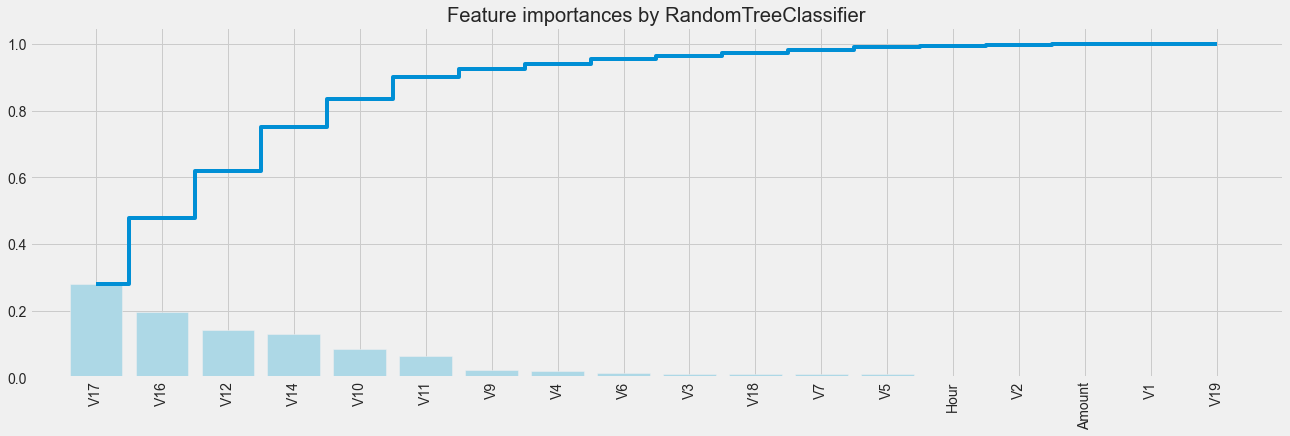

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances visualization##
importances = clf.feature_importances_
feat_names = transactions_new[x_feature].columns
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")

x = list(range(len(indices)))

plt.bar(x, importances[indices], color='lightblue',  align="center")
plt.step(x, np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(x, feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

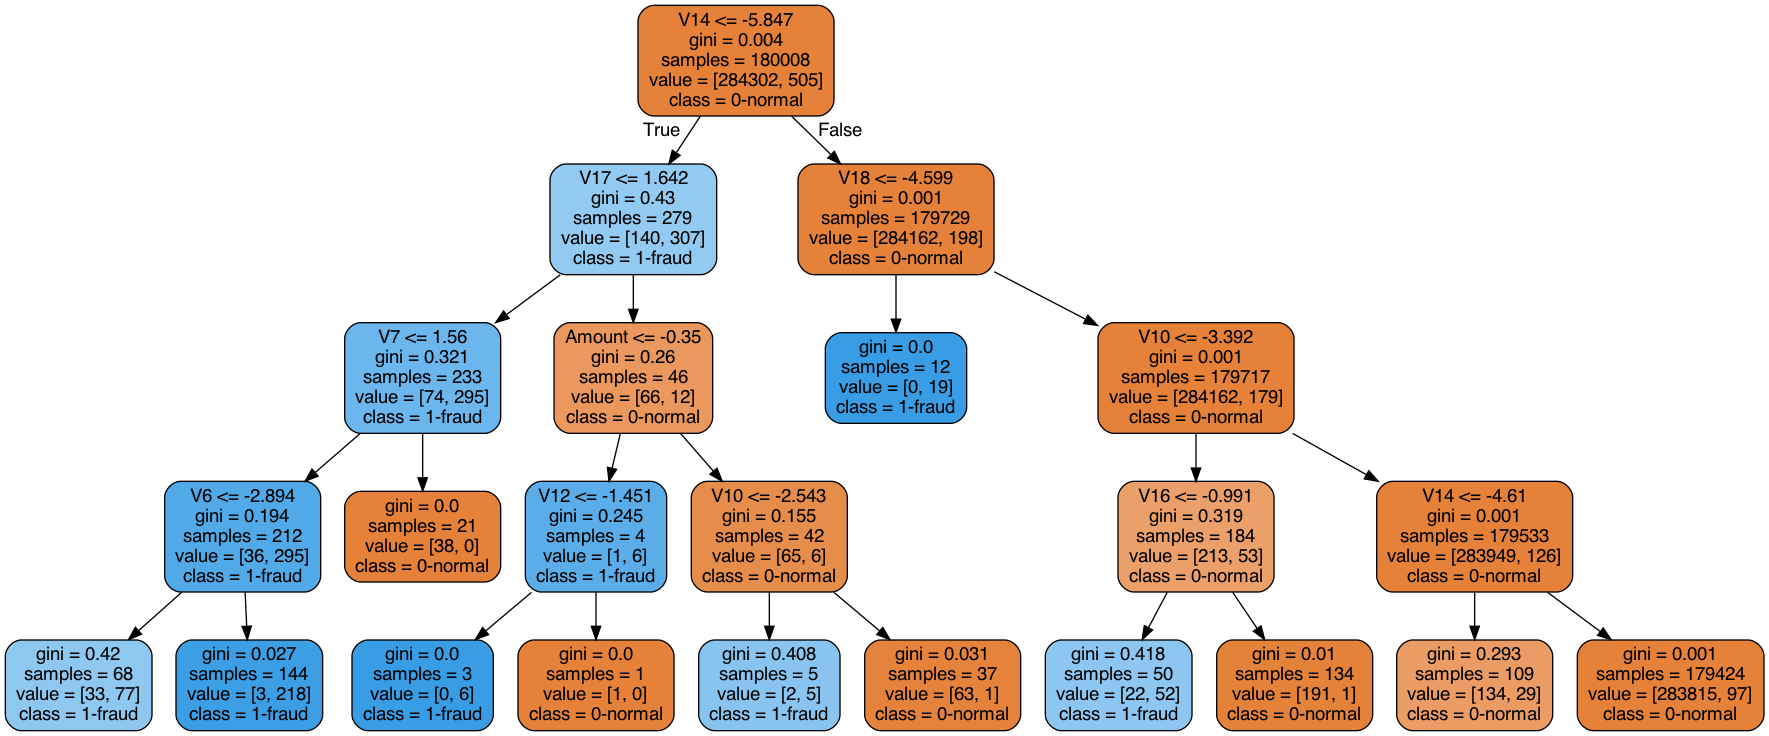

In [50]:
from sklearn import tree
# Sample a single tree from a random forest
estimator = clf.estimators_[5]

# Import the visualizer class
import pydotplus
from IPython.display import display, Image

dot_data = tree.export_graphviz(estimator, 
                                out_file=None, 
                                feature_names=x_feature,
                                class_names = ['0-normal', '1-fraud'],
                                filled = True,
                                rounded =True
                               )
dot_data=dot_data.replace('\n','')
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

Base on the dicision tree, we can see the importance of every features and how the tree is built.
Due to PCA, we can not check if the importance is coherent with reality.

## Model training
Sample unbalanced oversampling implementation<br/>

Common solution to sample imbalance: In this project scenario (1-fraud 0-normal) we need to oversample 1-fraud data 

<br/>Oversampling, increase positive samples so that the number of positive and negative samples is close, and then learn.

 <br/>Undersampling, removing some negative samples so that the number of positive and negative samples is close, and then learning The specific operation of the oversampling method uses SMOTE (Synthetic Minority Oversampling Technique)

In [51]:
# build independent and dependent
X = transactions[x_feature]
y = transactions["Class"]

n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('Number of samples：{}; Proportion of positive samples{:.2%}; Proportion of negative samples{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('Feature dimension：', X.shape[1])

Number of samples：284807; Proportion of positive samples0.17%; Proportion of negative samples99.83%
Feature dimension： 18


In [52]:
from imblearn.over_sampling import SMOTE # Import SMOTE module
# Process unbalanced data
sm = SMOTE(random_state=42)    # oversampling method
X, y = sm.fit_resample(X, y)
print('After balancing positive and negative samples by the SMOTE method')
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('Number of samples：{}; Proportion of positive samples{:.2%}; Proportion of negative samples{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('Feature dimension：', X.shape[1])

After balancing positive and negative samples by the SMOTE method
Number of samples：568630; Proportion of positive samples50.00%; Proportion of negative samples50.00%
Feature dimension： 18


## Splitting
Build training and testing sets

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size= 0.3,random_state=42)
len(X_train),len(X_test)


(398041, 170589)

## Confusion matrix
The confusion matrix is a summary of the prediction results of a classification problem

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

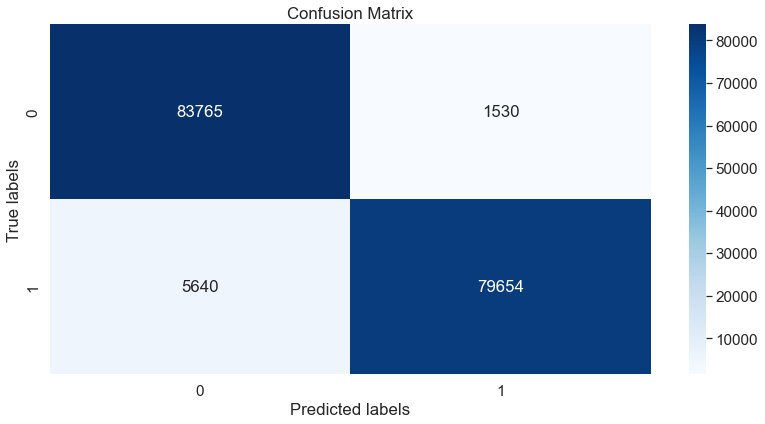

In [69]:
# Model training
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # build LogisticRegression
lr.fit(X_train, y_train)

# predit test st
y_pred = lr.predict(X_test)

# predit score 
y_score= lr.decision_function(X_test)

# Calculate and dispaly confusion matrix
cm= confusion_matrix(y_test,y_pred) # test is real value,pred is predit value
class_names=[0,1]

#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(cm,classes=class_names,title='Confusion matrix of Logistic regression')

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=plt.cm.Blues)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)


In [ ]:
print('--------Classification Report--------\n',classification_report(y_test,y_pred))

--------Classification Report--------
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     85295
           1       0.98      0.93      0.96     85294

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



We can see  TP and TN are good from confusions matrix, when we see  f1-score is 0.96 which means this model works remarkably. So the model identifies most of frauds without leaving too much errors into transactions and without classifying  too much transactions as fraud.

This gives us four basic-level indicators（True Positive=TP，False Negative=FN，False Positive，True Negative=FP）.

Therefore, the secondary indicators are as follows，<br/>

Accuracy is the most commonly used classification performance metric. It can be used to represent the accuracy of the model, that is, the number of correct models / the total number of samples. In general, the higher the accuracy of the model, the better the effect of the model.
<br/>Accuracy = (TP+TN)/(TP+FN+FP+TN)

<br/>Recall:The ratio of the number of samples that the model correctly identifies as positive to the total number of positive samples. In general, the higher the Recall, the more positive samples are predicted correctly by the model, and the better the effect of the model.<br/>Recall = TP/(TP+FN)

<br/>Precision=TP/(TP+FP)
<br/>Specificity=TN/(TN+FP)

With the four secondary indicators above, the result of the quantity in the confusion matrix can be converted into a ratio between 0-1. Easy to standardize measurements. So the Tertiary indicators is f1-score=2/((1/accuracy)+(1/recall))